In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]

#select_labels =["Raw","Phen Correct"]#["raw","BMC","ComBat","limma","SmartSVA (sv=7)","MINERVA (sv=6)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
#["raw","MINERVA+ (sv=8)", "MINERVA+ (sv=9)","MINERVA+ (sv=10)","MINERVA (sv=8)","MINERVA (sv=9)","MINERVA (sv=10)"]# ["raw","ComBat","limma","SmartSVA (sv=10)","MINERVA (sv=10)"]##[0.20,0.40,0.60,0.80]#["raw","ComBat","BMC","limma","SmartSVA (sv=1)","MINERVA (sv=1)"]# ["5-mer","6-mer","7-mer"]#
alternate_color = False


key ="Thomas_kmer_none_clr"
subfile = ""
select_columns_bool = False
shortened_shortened = False
trans_vec = False

if key == "Wirbel_PhenoCorrect":
    phen = ["DiseaseState","DiseaseState"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Wirbel_DataAugmentation":
    phen = ["DiseaseState","DiseaseState"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"

if key == "Thomas_kmer_PredDomainPheno":
    
    phen = ["bin_crc_adenomaORnormal","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Thomas_kmer_PhenoCorrect_multi":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Naive Bayes"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"

if key == "Thomas_kmer_DataAugment":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "AGP_abx_time_lapse":
    kmer_spec = 7
    numPc = [0,0] 
    phen = ["Abx0_6","Abx6_12"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history at 0-6 mo, 6-12 mo"
    phen_type = "class" 
    
    folder_names = ["AGP_max_k" + str(kmer_spec) + "_Abx0_6","AGP_max_k" + str(kmer_spec) + "_Abx6_12",]
    file_names =['rawfilter_TRUE' for i in range(0,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = ['Abx 0-6 months','Abx 6-12 months']
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.6,0.73)
    not_rotate=True
    subfile = ""

if key == "AGP_abx6_12_calibrate":
    kmer_spec = 5
    abx_spec = "6_12"
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["Abx" + abx_spec for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history" + abx_spec 
    phen_type = "class" 
    
    folder_names = ["AGP_max_k" + str(kmer_spec) + "_Abx" + abx_spec for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.55,0.70)
    not_rotate=True
    subfile = ""
if key == "AGP_abx_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_antibiotic_last_year" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history" 
    phen_type = "class" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.55,0.70)
    not_rotate=True
    subfile = "class_pred/"
    

if key == "AGP_abx":
    numPc = [0,0,0,0,2]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bin_antibiotic_last_year" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history" 
    phen_type = "class" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first2filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=2)"] #"Refactor (sv=9)","SmartSVA (sv=3)",
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    trans = "clr_scale"
    limit_spec =(0.55,0.75)
    shortened=True
    not_rotate=False
    subfile = "class_pred/"
if key == "AGP_BMI_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bmi_corrected" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "body mass index (BMI)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc#["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    metric_word = "pearson"
    chosen_classifier = "Naive Bayes"
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    limit_spec =(0.13,0.33)
    shortened=True
    not_rotate=True
    
    subfile = "cont_pred/"
    
if key == "AGP_BMI":
    numPc = [0,0,0,0,2]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bmi_corrected" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "body mass index (BMI)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first2filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=2)"] #"Refactor (sv=9)","SmartSVA (sv=3)",
    metric_word = "pearson"
    chosen_classifier = "Naive Bayes"
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    trans = "clr_scale"
    limit_spec =(0.13,0.37)
    shortened=True
    not_rotate=False
    
    subfile = "cont_pred/"

if key == "Thomas_kmer":
    numPc = [0,0,0,0,4] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=4)"]
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.5,1)
    shortened=True
    not_rotate=False
if key == "Thomas_kmer_none_clr":
    numPc = [0,5,0,4] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','rawfilter_TRUE','minerva_first5filter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw no trans","Raw clr+scale","MINERVA no trans (sv=5)","MINERVA clr+scale (sv=4)"]
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.5,1)
    shortened=True
    not_rotate=False
    shortened_shortened = True
    alternate_color = True
     
    trans = ["none","clr_scale","none","clr_scale"]
    trans_vec = True
if key == "Thomas_kmer_none_calibrate":
    numPc = [0,1,2,3,4,5,6,7] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#"bin_crc_adenomaORnormal" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k6" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc 
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    limit_spec =(0.5,0.85)
    shortened=True
    not_rotate=True
    trans_vec = True
    trans = ["none" for i in range(len(numPc))]

if key == "Thomas_kmer_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#"bin_crc_adenomaORnormal" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k6" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc 
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    limit_spec =(0.5,0.85)
    shortened=True
    not_rotate=True

    
if key == "Thomas_Augmentation":
    numPc = [0,0]
    phen = "bin_crc_normal"# #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_crc_adenomaORnormal"#""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"#"class
    folder_names = ['CRC_thomas_otu', 'CRC_thomas_otu_DataAugmentation']
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    
    
if key == "Thomas_otu_calibrate":    
    
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    folder_names = ["CRC_thomas_otu" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.5,1)
    shortened=True
    not_rotate=False
    
    
if key == "Thomas_otu":   
    numPc = [0,0,0,0,0] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    folder_names = ["Thomas_otu" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=4)"]
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.5,1)
    shortened=True
    not_rotate=False
    
    
    
    
    
    
    
if key == "Thomas_mse":
    numPc = [0,0]
    phen = "bin_crc_normal"# #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_crc_adenomaORnormal"#""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont"#"class"
    folder_names = ['CRC_thomas_otu', 'CRC_thomas_otu_PhenCorrect']
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']

if key == "Gibbons_k_otu":
    numPc = [0,0,150,4]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bin_crc","bin_crc_normal","bin_crc","bin_crc_normal" ]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status (normal vs cancer)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    
    phen_type = "class"
    
    folder_names = ["CRC_otu","CRC_k7","CRC_otu","CRC_k7"]
    file_names = ['rawfilter_TRUE','rawfilter_TRUE','minerva_first150filter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw OTU","Raw 7-mer","MINERVA OTU (sv=150)","MINERVA 7-mer (sv=4)"] #"Refactor (sv=9)","SmartSVA (sv=3)",
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    trans = "clr_scale"
    limit_spec =(0.4,1.1)
    shortened=True
    shortened_shortened=True
    not_rotate=False
    alternate_color = True
    
if key == "Gibbons_calibrate_otu":
    numPc = [0,1,2,3,10,20,40,60,80,100,140,150,200,220,240,260,300]
    phen = ["bin_crc"  for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status (normal vs cancer)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    
    phen_type = "class"
    
    
    folder_names = ["CRC_otu" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.4,1)
    not_rotate=True
    subfile = "class_pred/"
if key == "Gibbons_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_crc_adenomaORnormal"  for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status (adenoma/normal vs cancer)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    
    phen_type = "class"
    
    
    folder_names = ["CRC_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.4,1)
    not_rotate=True
    
    
if key == "Gibbons":
    numPc = [0,0,0,0,10] 
    phen = ["bin_crc_adenomaORnormal"  for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["CRC_k7" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
             'minerva_first10filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=10)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    
   
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.4,1.2)
    shortened=True
    not_rotate=False

    
if key == "Gibbons_DataAugment":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    metric_word = "accuracy"
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Gibbons_PhenoCorrect_multi":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

    metric_word = "accuracy"
    select_labels = ["Raw","PhenoCorrection"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    

if key == "Gibbons_PredDomainPheno":
    phen = ["bin_crc_adenomaORnormal","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    
if key == "Wirbel_PredDomainPheno":
    phen = ["DiseaseState","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    
if key == "Gibbons_PhenoCorrect_reg":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont"
    metric_word = 'pearson'
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    
    
if key == "Thomas_PhenoCorrect":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_thomas_otu","CRC_thomas_otu_PhenoCorrect"]
    file_names =['rawfilter_TRUE']+['PhenoCorrectfilter_TRUE']
    select_labels = numPc
    metric_word =  'auc_all'
if key == "Thomas_DomainCorrect":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_thomas_otu" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['DomainCorrectfilter_TRUE']
    select_labels = file_names
    metric_word =  'auc_all'
if key == "T2D":
    numPc = [0,0,0,0,1] 
    phen = ["bin_t2d" for i in range(len(numPc))] #" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "diabetes status" 
    phen_type = "class"
    
    
    folder_names = ["T2D_k7" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE'
                  ,'minerva_first1filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma",
                     "MINERVA (sv=1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word =  'auc_all'
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    chosen_classifier = "Random Forest"
    limit_spec =(0.4,1)
    not_rotate=False
    shortened = True
    
if key == "T2D_calibrate":


    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_t2d" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "diabetes status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["T2D_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc#["Raw"] + ["Refactor" + str(i) for i in range(1,len(numPc))] 
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    limit_spec =(0.4,0.83)
    not_rotate=True
    
#[0,1,2,3,10,20,40,60,80,100,140,150,200,220,240,260,300]#[0,1,2,3,10,20,30,40,50, 60, 70, 80 ,10]#
lin_model = "reg"
if not trans_vec:
    trans = ["clr_scale" for i in range(len(file_names))]
data_type = "kmer"
 #[0,0,0,0,1,1]#
#[0,1,2,3,4,5,6,7,8,9,10]#[0,0,0,0,5,5]#[0,1,2,3,4,5,6,7,8,9,10]##[20,30,40,50,60,70,80,90,100,110,120,130,150,200]#[0,0,0,0,3,1,2]#[0,1,2,3,4,5,6,7,8,9,10]###,20,30,40,50,100,120,140] #[0,0,0,0,10,10,1] # [0
#[key_folder for i in range(len(numPc))]
#folder_names = [key_folder for i in range(len(numPc))]
#folder_names = ['AGP_max_k6_subsample_' + str(i) + '_seed_1' for i in [20,40,60,80]]
#['CRC_k6' for i in range(len(numPc))]#
# ["AGP_max_k5","AGP_max_k6","AGP_max_k7"]#,"AGP_max_k8"]#['AGP_max_k7' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE','smartsva_first2filter_TRUE','minerva_first2filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]

#file_names = ['rawfilter_TRUE']+['mine3rva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

#file_names =['rawfilter_TRUE']+['minerva_plus_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,4)] + ['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(4,7)] 
#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#file_names =['rawfilter_TRUE' for i in range(0,len(numPc))] 

#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
# #

# file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
#              'smartsva_first7filter_TRUE','minerva_first6filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#'bmcfilter_TRUE','limmafilter_TRUE', ''refactor_first2filter_TRUE',
#file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first6filter_TRUE','refactor_first7filter_TRUE','minerva_first7filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

file_names = [file_names[f] + "_trans_" + trans[f] for f in range(len(file_names))]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of ' + phen_pretty# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    #'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = [chosen_classifier for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    #title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 


In [4]:
trans

['none', 'clr_scale', 'none', 'clr_scale']

In [5]:
folder_names

['Thomas_k6', 'Thomas_k6', 'Thomas_k6', 'Thomas_k6']

In [6]:
len(file_names)

4

In [7]:
file_names

['rawfilter_TRUE_trans_none',
 'rawfilter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_none',
 'minerva_first4filter_TRUE_trans_clr_scale']

In [8]:
df_metric = pd.DataFrame()

In [9]:
phen

['bin_crc_adenomaORnormal',
 'bin_crc_adenomaORnormal',
 'bin_crc_adenomaORnormal',
 'bin_crc_adenomaORnormal']

In [10]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        # "_lin_model_" + lin_model +
        filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        
        filename_temp = data_folder + folder_names[f] + "/" +subfile + data_type + "_BatchCorrected_"+ phen[f] + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all" or metric_word == "accuracy":
            index = folder_names[f] + file_names[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k6/kmer_BatchCorrected_bin_crc_adenomaORnormal_rawfilter_TRUE_trans_none_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k6/kmer_BatchCorrected_bin_crc_adenomaORnormal_rawfilter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k6/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first5filter_TRUE_trans_none_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Thomas_k6/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first4filter_TRUE_trans_clr_scale_classification_auc.pkl


In [11]:
metric_word

'auc_all'

In [12]:
df_metric
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

,Thomas_k6rawfilter_TRUE_trans_none,Thomas_k6rawfilter_TRUE_trans_clr_scale,Thomas_k6minerva_first5filter_TRUE_trans_none,Thomas_k6minerva_first4filter_TRUE_trans_clr_scale
0,0.618528,0.607022,0.662269,0.657112
1,0.624975,0.606824,0.690339,0.711565
2,0.688571,0.722143,0.660816,0.730510
3,0.720816,0.692857,0.683571,0.768673
4,0.608367,0.640408,0.709184,0.717245
5,0.694703,0.675858,0.635985,0.697084
6,0.659691,0.664848,0.656616,0.662865
7,0.642653,0.651020,0.750816,0.740204
8,0.726939,0.718265,0.653265,0.713878
9,0.569388,0.586327,0.681735,0.754898


In [13]:
file_names

['rawfilter_TRUE_trans_none',
 'rawfilter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_none',
 'minerva_first4filter_TRUE_trans_clr_scale']

In [14]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

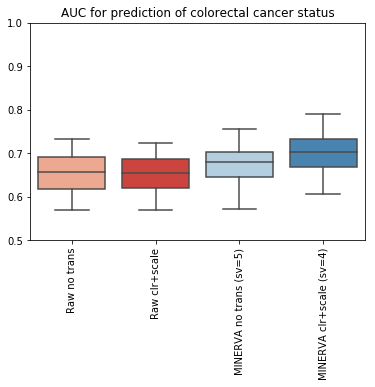

In [15]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only




# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        palette = sns.color_palette("Blues", df_metric.shape[1])
        plot_color = palette.as_hex()
        
        
        
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        if not alternate_color:
            palette = sns.color_palette("Reds", df_metric.shape[1]-1)
            plot_color = palette.as_hex()[::-1] + ["#0093FF"]#["#01d3e8"]
            #plot_color = ["#FF5353","#0093FF"]
        else:
            palette1 = sns.color_palette("Reds", 2)
            palette2 = sns.color_palette("Blues", 2)
            plot_color = palette1.as_hex() + palette2.as_hex()
            
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
g.set(ylim=limit_spec)

g.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')








In [16]:
df_metric.mean(axis=0)

Thomas_k6rawfilter_TRUE_trans_none                    0.655692
Thomas_k6rawfilter_TRUE_trans_clr_scale               0.654015
Thomas_k6minerva_first5filter_TRUE_trans_none         0.676102
Thomas_k6minerva_first4filter_TRUE_trans_clr_scale    0.702055
dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thomas_k6rawfilter_TRUE_trans_none v.s. Thomas_k6rawfilter_TRUE_trans_clr_scale: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.896e-01
Thomas_k6minerva_first5filter_TRUE_trans_none v.s. Thomas_k6minerva_first4filter_TRUE_trans_clr_scale: t-test independent samples with Bonferroni correction, P_val=1.151e-02 stat=-3.057e+00
Thomas_k6rawfilter_TRUE_trans_none v.s. Thomas_k6minerva_first5filter_TRUE_trans_none: t-test independent samples with Bonferroni correction, P_val=9.167e-02 stat=-2.311e+00
Thomas_k6rawfilter_TRUE_trans_none v.s. Thomas_k6minerva_first4filter_TRUE_trans_clr_scale: t-test independent samples with Bonferroni correction, P_val=2.516e-06 stat=-5.330e+00


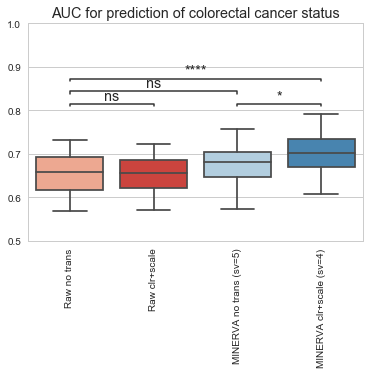

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")


x = "Method"
y = "AUC"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df_metric,palette=plot_color)
sns.set_context("paper", font_scale=1.5)   
if pair_test_all:
    if shortened:
        if shortened_shortened:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[2], df_metric.columns[3])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)
        else:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4]),
                                   (df_metric.columns[1], df_metric.columns[4])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)

    else:
        add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4]),
                                  (df_metric.columns[0], df_metric.columns[5]),
                                  (df_metric.columns[0], df_metric.columns[6])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)

else:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[0], df_metric.columns[5])],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)
# , (df_metric.columns[0], df_metric.columns[5])
if not_rotate:
    ax.set_xticklabels(labels = select_labels)
else:
    ax.set_xticklabels(rotation=90,labels = select_labels)
ax.set(ylim=limit_spec)
ax.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '_2.pdf',bbox_inches='tight')
#(df_metric.columns[0], df_metric.columns[2]),
#                              (df_metric.columns[0], df_metric.columns[3]),
#                             (df_metric.columns[0], df_metric.columns[4]),
#                             (df_metric.columns[0], df_metric.columns[5])

In [18]:
df_metric.sum(axis=1)

0     2.544932
1     2.633704
2     2.802041
3     2.865918
4     2.675204
5     2.703630
6     2.644019
7     2.784694
8     2.812347
9     2.592347
10    2.811149
11    2.709085
12    2.585306
13    2.753469
14    2.651327
15    2.778417
16    2.803214
17    2.685612
18    2.635306
19    2.774592
20    2.718607
21    2.632513
22    2.426531
23    2.875306
24    2.865714
25    2.566356
26    2.788137
27    2.674898
28    2.563878
29    2.675918
30    2.727633
31    2.770184
32    2.736939
33    2.645306
34    2.650816
35    2.762051
36    2.574192
37    2.663061
38    2.726224
39    2.676939
40    2.810653
41    2.939794
42    2.537551
43    2.428061
44    2.489184
45    2.682206
46    2.481055
47    2.395816
48    2.855000
49    2.806327
dtype: float64

In [19]:
from scipy.stats import ttest_ind


ttest_ind(df_metric[df_metric.columns[0]], df_metric[df_metric.columns[4]])


IndexError: index 4 is out of bounds for axis 0 with size 4